In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from PIL import Image
import pandas as pd
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import pygame
import matplotlib.animation as animation
from matplotlib import style
%matplotlib nbagg
from matplotlib.widgets import Button
import copy

In [13]:
#good_one
ck = (127, 33, 33)
background_colour = (255,255,255)
(width, height) = (143, 188)
screeni = pygame.display.set_mode((width, height))
pygame.display.set_caption('Initial Window')
screeni.fill(background_colour)

x_arr=[]
y_arr=[]
r_arr=[]
color_arr=[]
alpha_arr=[]
for i in range(0,128):
    x=random.randint(0,143)
    y=random.randint(0,188)
    r=random.randint(0,70)
    color=random.randint(0,255)
    alpha_value=random.randint(0,255)
    s=pygame.Surface([143,188])
    s.fill(ck)
    s.set_colorkey(ck)
    c=pygame.draw.circle(s,(color,color,color), (x,y), r)
    s.set_alpha(alpha_value)
    screeni.blit(s,[0,0])
    x_arr.append(x)
    y_arr.append(y)
    r_arr.append(r)
    color_arr.append(color)
    alpha_arr.append(alpha_value)
pygame.image.save(screeni,"initial.jpg")
pygame.display.flip()


In [70]:
ck = (127, 33, 33)
background_colour = (255,255,255)
(width, height) = (143, 188)
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('New Window')
screen.fill(background_colour)
def generateParent():
    for no_of_circles in range(0,128):
        x_new=x_arr[no_of_circles]
        y_new=y_arr[no_of_circles]
        r_new=r_arr[no_of_circles]
        color_new=color_arr[no_of_circles]
        alpha_value_new=alpha_arr[no_of_circles]
        s=pygame.Surface([143,188])
        s.fill(ck)
        s.set_colorkey(ck)
        c=pygame.draw.circle(s,(color_new,color_new,color_new), (x_new,y_new), r_new)
        s.set_alpha(alpha_value_new)
        screen.blit(s,[0,0])
    filename="generatedParent.jpg"
    pygame.image.save(screen,filename)
    pygame.display.flip()
    screen.fill((255,255,255))
    
        
    return(x_arr,y_arr,r_arr,color_arr,alpha_arr, filename)


In [71]:
def getFitness(candidate,target):
    generated_image=plt.imread(candidate)
    #im = Image.open(candidate)
    
    mona=plt.imread(target)
    #im = Image.open(target)
    
    fitness=0
    for x in range(0,143):
        for y in range(0,188):
            mona_value=mona[y,x]
            generated_image_value=generated_image[y,x,1]
            fitness=fitness + (mona_value-generated_image_value)**2
    
    return(fitness/100000)


In [104]:

def mutate(parent,i):
    xn=copy.deepcopy(parent[0])
    yn=copy.deepcopy(parent[1])
    rn=copy.deepcopy(parent[2])
    cn=copy.deepcopy(parent[3])
    an=copy.deepcopy(parent[4])
    
    if i<1000:
        circles=10
    else:
        circles=4

    nCircles=random.sample(range(0,127), circles)
    
    for zeta in nCircles:
        pick_prop=random.randint(1,7)
        if pick_prop==1:
            xn[zeta]=random.randint(0,143)

        if pick_prop==2:
            y_add=random.randint(0,188)
            yn[zeta]=y_add

        if pick_prop==3:
            r_add=random.randint(0,70)
            rn[zeta]=r_add

        if pick_prop==4:
            color_add=random.randint(0,245)
            cn[zeta]=color_add

        if pick_prop==5:
            alpha_value_add=random.randint(0,255)
            an[zeta]=alpha_value_add
        
        
                

    for no_of_circles in range(0,128):
        prob_draw=random.randint(1,2)
        if no_of_circles in nCircles==True & prob_draw==2:
            pass
        else:
            x_new=xn[no_of_circles]
            y_new=yn[no_of_circles]
            r_new=rn[no_of_circles]
            color_new=cn[no_of_circles]
            alpha_value_new=an[no_of_circles]
            s=pygame.Surface([143,188])
            s.fill(ck)
            s.set_colorkey(ck)
            c=pygame.draw.circle(s,(color_new,color_new,color_new), (x_new,y_new), r_new)
            s.set_alpha(alpha_value_new)
            screen.blit(s,[0,0])
    filename_mutated=str('generated_child'+str(i)+'.jpg')
    pygame.image.save(screen,filename_mutated)
    screen.fill((255,255,255))
    pygame.display.flip()
    
    

        
    return(xn,yn,rn,cn,an, filename_mutated)
    

In [16]:
def sumcheck(a,b):
    a=np.array(child[0])
    b=np.array(parentG[0])
    z1=np.sum(a-b,0)
    
    a=np.array(child[1])
    b=np.array(parentG[1])
    z2=np.sum(a-b,0)
    
    a=np.array(child[2])
    b=np.array(parentG[2])
    z3=np.sum(a-b,0)
    
    a=np.array(child[3])
    b=np.array(parentG[3])
    z4=np.sum(a-b,0)
    
    a=np.array(child[4])
    b=np.array(parentG[4])
    z5=np.sum(a-b,0)
    
    return(z1,z2,z3,z4,z5)


In [105]:
parentG=generateParent()
bestFitness=getFitness('generatedParent.jpg','darwin2.jpg')
i_value=[]
bf_value=[]
cf_value=[]
gen=0
while gen<1:
    print(gen)
    for i in range(0,2000):
        #print(sumcheck(child,parentG))
        child=mutate(parentG,i)
        childFitness=getFitness('generated_child'+str(i)+'.jpg','darwin2.jpg')
        i_value.append(i)
        bf_value.append(bestFitness)
        cf_value.append(childFitness)
        if childFitness<bestFitness:
            print('mutated')
            parentG=child
            bestFitness=childFitness
            screen.fill((255,255,255))
            pygame.display.flip()

        else:
            screen.fill((255,255,255))
            pygame.display.flip()
        print(i, bestFitness, childFitness)
    gen=gen+1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


0
0 6930.04559 6969.43714
mutated
1 6346.86027 6346.86027
mutated
2 6252.10133 6252.10133
3 6252.10133 6553.39319
4 6252.10133 6253.40928
5 6252.10133 6254.61749
6 6252.10133 6261.84338
7 6252.10133 6329.48537
8 6252.10133 6341.80178
9 6252.10133 7004.59357
mutated
10 6121.30475 6121.30475
11 6121.30475 6182.15285
mutated
12 5946.07829 5946.07829
mutated
13 5912.93315 5912.93315
14 5912.93315 5952.61323
15 5912.93315 5935.17446
mutated
16 5912.92399 5912.92399
mutated
17 5894.0557 5894.0557
mutated
18 5857.4517 5857.4517
mutated
19 5857.43729 5857.43729
mutated
20 5791.73146 5791.73146
mutated
21 5756.71349 5756.71349
22 5756.71349 5784.549
mutated
23 5725.68907 5725.68907
24 5725.68907 5934.67119
25 5725.68907 5758.89127
mutated
26 5698.63386 5698.63386
mutated
27 5653.60485 5653.60485
28 5653.60485 5711.55197
29 5653.60485 5702.56471
30 5653.60485 6519.95099
31 5653.60485 5770.99584
32 5653.60485 5815.65
33 5653.60485 5777.08418
mutated
34 5577.4848 5577.4848
35 5577.4848 5785.3764
m

295 3600.02108 3605.33718
mutated
296 3595.50922 3595.50922
297 3595.50922 3602.34502
298 3595.50922 3684.31412
299 3595.50922 3595.58229
300 3595.50922 3605.24054
301 3595.50922 3599.37231
302 3595.50922 3797.08561
303 3595.50922 3803.45148
mutated
304 3592.12606 3592.12606
305 3592.12606 3620.63723
306 3592.12606 3634.79815
307 3592.12606 3727.17154
308 3592.12606 3898.62494
309 3592.12606 3668.5878
310 3592.12606 3650.67836
311 3592.12606 3593.15343
312 3592.12606 4013.43671
mutated
313 3591.26986 3591.26986
314 3591.26986 3609.26111
315 3591.26986 3593.63555
316 3591.26986 3592.59953
317 3591.26986 3642.62684
318 3591.26986 3604.90209
319 3591.26986 3660.39705
320 3591.26986 4295.09187
321 3591.26986 4188.88215
322 3591.26986 3697.6265
323 3591.26986 3903.63935
mutated
324 3548.12941 3548.12941
325 3548.12941 3556.53349
326 3548.12941 3571.05828
327 3548.12941 3554.77262
328 3548.12941 3610.38453
329 3548.12941 3629.15693
330 3548.12941 3654.75895
331 3548.12941 3549.46954
332 3548

602 3301.11062 3305.21094
mutated
603 3300.17858 3300.17858
604 3300.17858 3302.15617
605 3300.17858 3369.84898
606 3300.17858 3809.92901
mutated
607 3292.47588 3292.47588
608 3292.47588 3400.2816
609 3292.47588 3419.64263
610 3292.47588 3658.95092
611 3292.47588 3499.72822
612 3292.47588 3319.44043
613 3292.47588 3292.47588
614 3292.47588 3309.2418
615 3292.47588 4121.05485
616 3292.47588 3294.9537
617 3292.47588 3316.83104
mutated
618 3292.27388 3292.27388
619 3292.27388 3311.22372
620 3292.27388 3298.22235
mutated
621 3292.23249 3292.23249
mutated
622 3288.13793 3288.13793
623 3288.13793 3292.71371
624 3288.13793 3595.32881
625 3288.13793 3304.86858
mutated
626 3284.31928 3284.31928
627 3284.31928 4276.01058
628 3284.31928 3284.52885
629 3284.31928 3567.39848
630 3284.31928 3390.66232
mutated
631 3284.01103 3284.01103
632 3284.01103 3288.44051
633 3284.01103 3287.18768
634 3284.01103 3408.14347
635 3284.01103 3389.32729
mutated
636 3279.90657 3279.90657
637 3279.90657 3279.99526
mut

910 3196.46375 3198.6099
911 3196.46375 3611.97846
912 3196.46375 3507.20085
913 3196.46375 3196.65017
914 3196.46375 3368.27684
915 3196.46375 3197.90401
916 3196.46375 3262.21805
917 3196.46375 3304.74523
918 3196.46375 3209.42612
919 3196.46375 3199.5582
920 3196.46375 3197.87382
921 3196.46375 3254.39956
922 3196.46375 3810.51424
923 3196.46375 3600.87034
924 3196.46375 3533.33932
925 3196.46375 3280.31206
926 3196.46375 3341.95206
927 3196.46375 3440.32513
928 3196.46375 3201.42435
929 3196.46375 3196.46375
mutated
930 3196.22195 3196.22195
931 3196.22195 3219.1983
932 3196.22195 3208.55211
933 3196.22195 3412.53121
934 3196.22195 3238.38656
mutated
935 3195.68772 3195.68772
936 3195.68772 3245.86394
937 3195.68772 3276.26281
938 3195.68772 5531.36193
939 3195.68772 3199.14906
940 3195.68772 3216.7499
941 3195.68772 3204.02722
942 3195.68772 3203.83599
mutated
943 3191.16276 3191.16276
944 3191.16276 3657.97038
945 3191.16276 3276.58499
946 3191.16276 3490.43927
947 3191.16276 321

1210 3127.54715 3741.5911
1211 3127.54715 3147.50433
1212 3127.54715 3532.9033
1213 3127.54715 3356.1963
1214 3127.54715 3130.52056
1215 3127.54715 3128.33892
mutated
1216 3127.24006 3127.24006
1217 3127.24006 3134.68917
1218 3127.24006 3138.84936
1219 3127.24006 3242.95124
1220 3127.24006 3127.24006
mutated
1221 3127.17898 3127.17898
1222 3127.17898 3127.17898
1223 3127.17898 3199.27283
1224 3127.17898 3157.0618
1225 3127.17898 3413.48159
1226 3127.17898 3130.80873
1227 3127.17898 3201.46727
1228 3127.17898 3139.20757
mutated
1229 3127.17173 3127.17173
1230 3127.17173 3128.4036
1231 3127.17173 3139.90558
1232 3127.17173 3207.56299
1233 3127.17173 3147.48131
mutated
1234 3126.54545 3126.54545
1235 3126.54545 3127.69737
1236 3126.54545 3183.38968
1237 3126.54545 3171.24502
1238 3126.54545 3144.62383
1239 3126.54545 3186.30907
1240 3126.54545 3127.95792
1241 3126.54545 3132.62787
1242 3126.54545 3126.54545
1243 3126.54545 3127.78262
mutated
1244 3125.9993 3125.9993
1245 3125.9993 3126.74

1504 3069.70706 3120.0514
1505 3069.70706 3121.27748
1506 3069.70706 3099.19441
1507 3069.70706 3069.70706
1508 3069.70706 3069.70706
1509 3069.70706 3260.76042
1510 3069.70706 3069.70706
1511 3069.70706 4063.34932
1512 3069.70706 3211.41009
mutated
1513 3069.70119 3069.70119
1514 3069.70119 3108.99906
1515 3069.70119 3069.78634
1516 3069.70119 3110.52862
mutated
1517 3069.18074 3069.18074
1518 3069.18074 3082.25227
1519 3069.18074 3554.42583
1520 3069.18074 3130.44295
1521 3069.18074 3073.76814
1522 3069.18074 3073.47208
1523 3069.18074 3069.21528
1524 3069.18074 3069.21442
1525 3069.18074 3069.77525
1526 3069.18074 3075.56291
mutated
1527 3067.80534 3067.80534
1528 3067.80534 3131.3002
1529 3067.80534 3147.92056
1530 3067.80534 3068.66741
mutated
1531 3067.55826 3067.55826
1532 3067.55826 3105.26943
1533 3067.55826 3072.18957
1534 3067.55826 3254.09314
mutated
1535 3066.9612 3066.9612
1536 3066.9612 3159.64095
1537 3066.9612 3118.67436
1538 3066.9612 3067.63355
1539 3066.9612 3074.41

1801 3043.56944 3043.64922
1802 3043.56944 3043.61624
1803 3043.56944 3045.24236
1804 3043.56944 3134.56308
1805 3043.56944 3043.69337
1806 3043.56944 3043.56944
1807 3043.56944 3043.56944
1808 3043.56944 3066.67558
1809 3043.56944 3393.06952
1810 3043.56944 3054.43604
1811 3043.56944 3107.83292
1812 3043.56944 3044.08311
1813 3043.56944 3046.5166
1814 3043.56944 3093.9293
1815 3043.56944 3043.79756
1816 3043.56944 3160.85978
mutated
1817 3028.20648 3028.20648
1818 3028.20648 4142.80584
1819 3028.20648 3030.726
1820 3028.20648 3028.24106
1821 3028.20648 3149.82115
1822 3028.20648 3029.33731
1823 3028.20648 3057.66113
1824 3028.20648 3028.20648
mutated
1825 3027.39961 3027.39961
mutated
1826 3027.21588 3027.21588
1827 3027.21588 3027.21588
mutated
1828 3026.95464 3026.95464
1829 3026.95464 3026.95464
1830 3026.95464 3027.13204
mutated
1831 3026.91509 3026.91509
1832 3026.91509 3040.02742
1833 3026.91509 3034.68125
1834 3026.91509 3179.28384
1835 3026.91509 3029.8066
1836 3026.91509 3028

In [235]:
def sumcheck(a,b):
    a=np.array(child[0])
    b=np.array(parentG[0])
    z1=np.sum(a-b,0)
    
    a=np.array(child[1])
    b=np.array(parentG[1])
    z2=np.sum(a-b,0)
    
    a=np.array(child[2])
    b=np.array(parentG[2])
    z3=np.sum(a-b,0)
    
    a=np.array(child[3])
    b=np.array(parentG[3])
    z4=np.sum(a-b,0)
    
    a=np.array(child[4])
    b=np.array(parentG[4])
    z5=np.sum(a-b,0)
    
    return(z1,z2,z3,z4,z5)

    

In [71]:
os.remove('generatedParent.jpg')

In [72]:
os.remove('initial.jpg')

In [78]:
for i in range(0,2000):
    os.remove('generated_child'+str(i)+'.jpg')

In [ ]:
        for no_of_circles in range(0,150):
            x_new=child[0][no_of_circles]
            y_new=child[1][no_of_circles]
            r_new=child[2][no_of_circles]
            color_new=child[3][no_of_circles]
            alpha_value_new=child[4][no_of_circles]
            s=pygame.Surface([143,188])
            s.fill(ck)
            s.set_colorkey(ck)
            c=pygame.draw.circle(s,(color_new,color_new,color_new), (x_new,y_new), r_new)
            s.set_alpha(alpha_value_new)
            screen.blit(s,[0,0])
        filename="new_best.jpg"
        pygame.image.save(screen,filename)

In [15]:
parentG=generateParent()
child=mutate(parentG,i)
print(sumcheck(child,parentG))

(34, 218, 0, 223, 185)


<IPython.core.display.Javascript object>


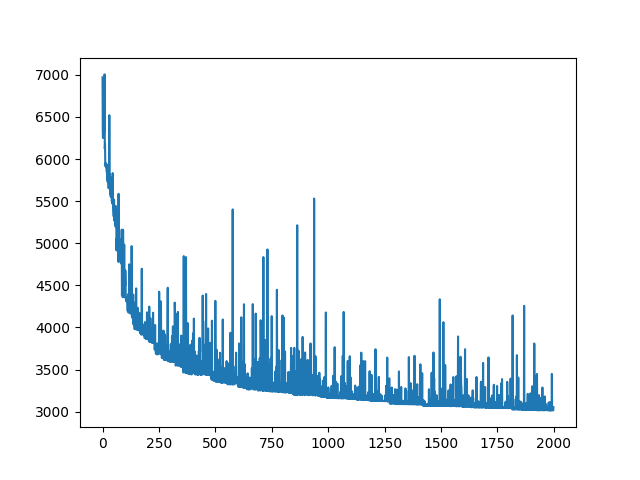

In [106]:
plt.plot(cf_value)

In [227]:
def test(x):
    xn=x[0]
    print(xn)
    print(x)
    xn[0]=3
    print(x)

In [228]:
test(([1,2,3],[4,5,6]))

[1, 2, 3]
([1, 2, 3], [4, 5, 6])
([3, 2, 3], [4, 5, 6])


In [107]:
gen=0
while gen<300:
    print(gen)
    for i in range(0,2000):
        #print(sumcheck(child,parentG))
        child=mutate(parentG,i)
        childFitness=getFitness('generated_child'+str(i)+'.jpg','darwin2.jpg')
        i_value.append(i)
        bf_value.append(bestFitness)
        cf_value.append(childFitness)
        if childFitness<bestFitness:
            print('mutated')
            parentG=child
            bestFitness=childFitness
            screen.fill((255,255,255))
            pygame.display.flip()

        else:
            screen.fill((255,255,255))
            pygame.display.flip()
        print(i, bestFitness, childFitness)
    gen=gen+1

0
0 3015.80596 4037.03004
1 3015.80596 3028.77145


/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


2 3015.80596 3145.35931
3 3015.80596 3041.5999
4 3015.80596 3267.61761
5 3015.80596 3115.61428
6 3015.80596 3098.73233
7 3015.80596 3015.84848
8 3015.80596 3052.87922
9 3015.80596 3467.86256
10 3015.80596 3087.87507
11 3015.80596 3041.57206
12 3015.80596 3016.69763
13 3015.80596 3024.2885
14 3015.80596 3283.04829
15 3015.80596 3021.5649
16 3015.80596 3022.58078
17 3015.80596 3041.26411
18 3015.80596 3192.09535
19 3015.80596 3021.64295
20 3015.80596 3085.93182
21 3015.80596 3020.32544
22 3015.80596 3016.05379
23 3015.80596 3171.88638
24 3015.80596 3363.71992
25 3015.80596 3024.80429
26 3015.80596 3035.70033
27 3015.80596 3045.42775
mutated
28 3013.25504 3013.25504
mutated
29 3012.95598 3012.95598
30 3012.95598 3029.85632
31 3012.95598 3303.64382
32 3012.95598 3590.58182
33 3012.95598 3699.05944
34 3012.95598 3025.6236
35 3012.95598 3091.2688
36 3012.95598 3051.58971
37 3012.95598 3397.73835
38 3012.95598 3145.22086
39 3012.95598 3220.78331
40 3012.95598 3040.31812
mutated
41 3011.66306 

323 3010.16697 3019.04695
324 3010.16697 3052.64085
325 3010.16697 3055.73197
326 3010.16697 3162.1215
327 3010.16697 3170.64354
328 3010.16697 3010.28843
329 3010.16697 3081.66701
330 3010.16697 3206.14763
331 3010.16697 3035.47479
332 3010.16697 3058.84639
333 3010.16697 3099.38912
334 3010.16697 3041.52012
335 3010.16697 3074.24872
336 3010.16697 3019.17831
337 3010.16697 3174.19483
338 3010.16697 3061.62708
339 3010.16697 3102.9001
mutated
340 3005.80029 3005.80029
341 3005.80029 3172.06545
342 3005.80029 3044.52648
343 3005.80029 3214.39759
344 3005.80029 3009.11757
345 3005.80029 3011.01279
346 3005.80029 3020.26713
347 3005.80029 3054.87807
348 3005.80029 3008.62445
349 3005.80029 3929.69349
350 3005.80029 3128.77616
351 3005.80029 3008.43415
352 3005.80029 3010.29913
353 3005.80029 3192.49154
354 3005.80029 3350.04069
355 3005.80029 3097.53868
356 3005.80029 3657.85201
357 3005.80029 3038.53433
358 3005.80029 3043.20354
359 3005.80029 3007.1036
360 3005.80029 3014.26531
361 300

640 3000.28142 3051.25227
641 3000.28142 3121.1249
642 3000.28142 3001.08727
643 3000.28142 3082.2297
644 3000.28142 3094.65167
645 3000.28142 3043.99594
646 3000.28142 3519.32397
647 3000.28142 3019.89357
648 3000.28142 3063.52102
649 3000.28142 3793.7632
650 3000.28142 3007.33972
651 3000.28142 3007.50252
652 3000.28142 3263.8795
653 3000.28142 3025.55961
654 3000.28142 3329.48985
655 3000.28142 3091.97856
656 3000.28142 3012.14103
657 3000.28142 3245.22892
658 3000.28142 3054.32919
659 3000.28142 4058.50561
660 3000.28142 3238.45274
661 3000.28142 3231.64309
662 3000.28142 3384.81562
663 3000.28142 3532.74079
664 3000.28142 3000.31511
mutated
665 2999.70033 2999.70033
666 2999.70033 3000.75852
mutated
667 2999.56594 2999.56594
668 2999.56594 3000.07866
669 2999.56594 3223.23034
670 2999.56594 3290.63563
671 2999.56594 3219.48873
672 2999.56594 3003.67336
673 2999.56594 3120.17676
674 2999.56594 3144.44839
675 2999.56594 3004.89552
676 2999.56594 3016.35665
677 2999.56594 3155.95257


954 2990.30821 3479.87604
955 2990.30821 3039.41967
956 2990.30821 2990.60639
957 2990.30821 3112.90452
958 2990.30821 3126.6755
959 2990.30821 3134.39999
960 2990.30821 3000.34838
961 2990.30821 3034.73069
962 2990.30821 3292.75986
963 2990.30821 2990.3168
964 2990.30821 2990.30821
965 2990.30821 3158.91584
966 2990.30821 2994.3373
967 2990.30821 3060.22503
968 2990.30821 3008.72857
mutated
969 2989.85681 2989.85681
970 2989.85681 3019.86176
971 2989.85681 2989.85681
972 2989.85681 3031.79237
973 2989.85681 3675.29045
974 2989.85681 3172.57302
mutated
975 2985.80545 2985.80545
976 2985.80545 2993.53237
977 2985.80545 3387.34256
978 2985.80545 3088.50706
979 2985.80545 3036.22356
980 2985.80545 3087.97898
981 2985.80545 3042.98786
982 2985.80545 2985.84727
mutated
983 2985.36497 2985.36497
mutated
984 2980.80522 2980.80522
985 2980.80522 3439.94673
986 2980.80522 3094.56221
987 2980.80522 3145.77747
988 2980.80522 2986.13599
989 2980.80522 2998.58295
990 2980.80522 2986.84921
991 2980.

1252 2960.25258 3006.35357
1253 2960.25258 2961.24171
1254 2960.25258 2984.55929
1255 2960.25258 2975.11407
1256 2960.25258 3072.75864
1257 2960.25258 2960.39907
1258 2960.25258 3024.92724
1259 2960.25258 2967.75782
mutated
1260 2960.24944 2960.24944
1261 2960.24944 2960.25688
1262 2960.24944 2976.76765
1263 2960.24944 3051.28644
1264 2960.24944 2977.01569
1265 2960.24944 2963.30051
1266 2960.24944 2975.04371
1267 2960.24944 3053.34516
1268 2960.24944 2960.26702
1269 2960.24944 2969.1674
1270 2960.24944 2960.24944
1271 2960.24944 2961.80441
1272 2960.24944 2961.11103
1273 2960.24944 2960.36279
1274 2960.24944 2960.24944
1275 2960.24944 3008.4936
1276 2960.24944 2964.90594
1277 2960.24944 2965.96396
1278 2960.24944 2960.24944
1279 2960.24944 2960.24944
1280 2960.24944 2960.24944
1281 2960.24944 2961.94804
1282 2960.24944 2960.24944
1283 2960.24944 2972.32697
1284 2960.24944 3192.22744
1285 2960.24944 3082.89057
1286 2960.24944 2985.77563
1287 2960.24944 2960.29106
1288 2960.24944 3151.8

1551 2953.8069 2954.03101
1552 2953.8069 2973.98265
1553 2953.8069 2954.4325
1554 2953.8069 3001.81636
1555 2953.8069 2982.78989
1556 2953.8069 2969.92409
1557 2953.8069 3254.49854
1558 2953.8069 3444.38312
1559 2953.8069 3166.80217
1560 2953.8069 3025.63812
1561 2953.8069 2998.95473
1562 2953.8069 2961.11441
1563 2953.8069 2959.19083
1564 2953.8069 2953.80695
mutated
1565 2947.74584 2947.74584
1566 2947.74584 3093.56848
1567 2947.74584 2948.30055
1568 2947.74584 2947.92584
1569 2947.74584 2947.74584
mutated
1570 2947.64443 2947.64443
1571 2947.64443 2947.64443
1572 2947.64443 2948.7853
1573 2947.64443 3116.82364
1574 2947.64443 2948.3386
1575 2947.64443 3023.05442
1576 2947.64443 3125.12429
mutated
1577 2947.31107 2947.31107
1578 2947.31107 3202.25878
1579 2947.31107 2947.88494
mutated
1580 2947.08645 2947.08645
1581 2947.08645 2947.11353
1582 2947.08645 2947.66462
1583 2947.08645 2947.67709
1584 2947.08645 2947.126
1585 2947.08645 2947.14495
1586 2947.08645 3006.53208
1587 2947.08645

1848 2916.36542 2946.39383
1849 2916.36542 3074.21014
1850 2916.36542 2916.36542
1851 2916.36542 2991.26356
1852 2916.36542 2923.84803
1853 2916.36542 2918.88253
1854 2916.36542 3028.36993
1855 2916.36542 3231.51641
1856 2916.36542 2965.127
1857 2916.36542 2916.36542
1858 2916.36542 2916.36542
1859 2916.36542 2938.41125
1860 2916.36542 2916.44583
mutated
1861 2916.19137 2916.19137
1862 2916.19137 2922.59578
1863 2916.19137 2916.23461
1864 2916.19137 2917.3706
1865 2916.19137 2916.1971
1866 2916.19137 2936.91852
1867 2916.19137 2916.2001
1868 2916.19137 2920.33363
1869 2916.19137 2933.12508
1870 2916.19137 2916.19137
1871 2916.19137 2916.25343
1872 2916.19137 2971.42808
1873 2916.19137 3055.54982
1874 2916.19137 2975.84186
1875 2916.19137 2916.21622
1876 2916.19137 3389.21418
1877 2916.19137 2916.22118
1878 2916.19137 3025.67358
1879 2916.19137 2916.9552
1880 2916.19137 2919.86724
mutated
1881 2915.99054 2915.99054
1882 2915.99054 2972.98901
1883 2915.99054 3056.73278
1884 2915.99054 29

165 2900.32452 2908.22791
166 2900.32452 2913.02404
167 2900.32452 3193.07456
168 2900.32452 2905.58952
169 2900.32452 2932.86136
170 2900.32452 2964.70723
171 2900.32452 2912.82977
172 2900.32452 3415.14679
173 2900.32452 2982.92573
174 2900.32452 3041.72045
175 2900.32452 3406.03652
176 2900.32452 2905.80638
177 2900.32452 2908.11684
178 2900.32452 3002.06723
179 2900.32452 3974.14934
180 2900.32452 2984.57819
181 2900.32452 2962.34729
182 2900.32452 3084.80598
183 2900.32452 2907.09089
184 2900.32452 2914.83004
185 2900.32452 2914.60794
186 2900.32452 2949.78054
187 2900.32452 2951.88868
188 2900.32452 2977.36196
189 2900.32452 2912.43784
190 2900.32452 3172.26454
191 2900.32452 2978.73271
192 2900.32452 2955.62629
193 2900.32452 3186.47842
194 2900.32452 2954.33713
195 2900.32452 2901.71386
196 2900.32452 2913.56154
197 2900.32452 3845.52196
198 2900.32452 3614.13432
mutated
199 2897.67933 2897.67933
200 2897.67933 2976.98271
201 2897.67933 3398.55273
202 2897.67933 2930.53363
203 

480 2886.23196 3105.20196
481 2886.23196 3647.25517
482 2886.23196 3945.20949
483 2886.23196 3272.99991
484 2886.23196 3068.52149
485 2886.23196 2959.99267
486 2886.23196 2949.70394
487 2886.23196 3401.61302
488 2886.23196 2886.63701
489 2886.23196 2897.84849
490 2886.23196 2903.4049
491 2886.23196 3165.9906
492 2886.23196 2965.9802
493 2886.23196 2970.24676
494 2886.23196 2887.40078
495 2886.23196 3132.49749
496 2886.23196 3329.39934
497 2886.23196 3040.60094
mutated
498 2886.02405 2886.02405
499 2886.02405 3188.53891
500 2886.02405 2894.99163
501 2886.02405 2962.43647
mutated
502 2885.96847 2885.96847
503 2885.96847 2888.4286
504 2885.96847 3692.50492
505 2885.96847 2886.83892
506 2885.96847 3120.82714
507 2885.96847 3061.28157
508 2885.96847 3148.88538
509 2885.96847 2892.23458
510 2885.96847 2901.07371
511 2885.96847 2998.13502
512 2885.96847 2942.59144
513 2885.96847 2963.57309
514 2885.96847 2887.31453
mutated
515 2885.36601 2885.36601
516 2885.36601 3071.97902
517 2885.36601 298

794 2879.04912 2944.48565
795 2879.04912 2920.56539
796 2879.04912 2951.47429
797 2879.04912 2987.0283
798 2879.04912 2910.03387
799 2879.04912 3033.53353
800 2879.04912 2904.68881
801 2879.04912 3002.64228
802 2879.04912 3492.87328
803 2879.04912 3103.56921
804 2879.04912 2904.13017
805 2879.04912 2940.17312
806 2879.04912 2908.36979
807 2879.04912 2998.82505
808 2879.04912 2967.4761
809 2879.04912 2995.87346
810 2879.04912 3423.832
811 2879.04912 2897.92424
812 2879.04912 2891.37482
813 2879.04912 3106.27961
814 2879.04912 2882.96129
815 2879.04912 3071.17342
816 2879.04912 3039.17368
817 2879.04912 3244.30987
818 2879.04912 3110.16782
819 2879.04912 2902.3424
820 2879.04912 3094.5489
821 2879.04912 3072.5421
822 2879.04912 2944.83158
823 2879.04912 2901.00325
824 2879.04912 3045.718
825 2879.04912 3028.18921
826 2879.04912 2978.32207
827 2879.04912 3036.74591
828 2879.04912 3480.55717
829 2879.04912 2990.86724
830 2879.04912 2913.48079
831 2879.04912 2880.09564
832 2879.04912 3107.0

1105 2861.0853 2996.19361
1106 2861.0853 2893.05807
1107 2861.0853 2866.36515
1108 2861.0853 2861.14504
1109 2861.0853 2861.0853
1110 2861.0853 2864.00357
1111 2861.0853 2863.20988
1112 2861.0853 2861.0853
1113 2861.0853 2861.0853
1114 2861.0853 2861.60914
mutated
1115 2861.00312 2861.00312
1116 2861.00312 2891.73502
mutated
1117 2860.97073 2860.97073
mutated
1118 2860.44843 2860.44843
1119 2860.44843 2860.44843
mutated
1120 2858.26602 2858.26602
1121 2858.26602 2860.47836
1122 2858.26602 3062.92253
1123 2858.26602 3046.98943
1124 2858.26602 2901.87058
1125 2858.26602 2858.26602
1126 2858.26602 2859.30287
1127 2858.26602 2892.03
1128 2858.26602 2859.81575
1129 2858.26602 2859.52009
1130 2858.26602 2886.69862
1131 2858.26602 2859.41593
1132 2858.26602 2863.88573
1133 2858.26602 2858.26602
1134 2858.26602 2957.53762
1135 2858.26602 2858.86022
1136 2858.26602 2860.51398
mutated
1137 2851.11614 2851.11614
mutated
1138 2850.00453 2850.00453
1139 2850.00453 2852.27603
1140 2850.00453 2850.00

1404 2844.71558 3033.88742
mutated
1405 2844.48788 2844.48788
mutated
1406 2844.07835 2844.07835
1407 2844.07835 2845.9639
1408 2844.07835 2844.41985
1409 2844.07835 3071.21303
1410 2844.07835 3589.26751
1411 2844.07835 2854.23099
1412 2844.07835 2844.07835
1413 2844.07835 2946.46842
mutated
1414 2842.87546 2842.87546
mutated
1415 2841.65231 2841.65231
1416 2841.65231 2891.69383
1417 2841.65231 2841.65467
1418 2841.65231 2853.58376
1419 2841.65231 2844.17749
1420 2841.65231 2851.65059
mutated
1421 2841.62862 2841.62862
1422 2841.62862 2842.81488
1423 2841.62862 2841.62862
1424 2841.62862 2875.42503
1425 2841.62862 2851.1151
1426 2841.62862 2842.08024
1427 2841.62862 2841.62862
1428 2841.62862 2841.62862
1429 2841.62862 2885.32567
1430 2841.62862 2936.09279
1431 2841.62862 2844.53662
1432 2841.62862 2861.06099
mutated
1433 2841.19961 2841.19961
1434 2841.19961 2902.84822
1435 2841.19961 2841.21521
1436 2841.19961 2844.58366
1437 2841.19961 2936.51896
1438 2841.19961 2879.37631
1439 2841

1703 2836.52552 2837.19242
mutated
1704 2836.51231 2836.51231
1705 2836.51231 3520.77307
1706 2836.51231 2837.58586
1707 2836.51231 2897.02224
1708 2836.51231 3344.02378
1709 2836.51231 2838.88973
1710 2836.51231 2844.62537
1711 2836.51231 2836.68766
1712 2836.51231 2836.74847
mutated
1713 2835.14517 2835.14517
1714 2835.14517 2842.26853
1715 2835.14517 2835.14517
1716 2835.14517 2864.09335
1717 2835.14517 2839.63628
1718 2835.14517 2920.10966
1719 2835.14517 2835.84819
1720 2835.14517 2835.14517
1721 2835.14517 2850.54092
1722 2835.14517 3076.09287
1723 2835.14517 2835.31263
1724 2835.14517 2835.72514
1725 2835.14517 2835.37307
1726 2835.14517 2840.58608
1727 2835.14517 2841.24721
1728 2835.14517 2910.30975
1729 2835.14517 2835.72514
1730 2835.14517 2871.80411
1731 2835.14517 2835.82497
1732 2835.14517 3562.87822
1733 2835.14517 2835.14517
1734 2835.14517 2837.06706
1735 2835.14517 2914.65252
1736 2835.14517 2835.80517
1737 2835.14517 2835.14517
mutated
1738 2834.98832 2834.98832
1739

7 2832.42151 2862.0637
8 2832.42151 2928.40511
9 2832.42151 2832.67869
10 2832.42151 2866.65062
11 2832.42151 2834.9622
12 2832.42151 2850.20812
13 2832.42151 2837.15585
14 2832.42151 2917.54865
15 2832.42151 3033.05275
16 2832.42151 3067.54816
17 2832.42151 2929.41037
18 2832.42151 3252.48042
19 2832.42151 2906.74721
20 2832.42151 2962.66986
21 2832.42151 2879.59645
22 2832.42151 2859.06406
23 2832.42151 2884.75884
24 2832.42151 2875.36285
25 2832.42151 2925.32064
26 2832.42151 3262.83789
27 2832.42151 2845.27959
28 2832.42151 2922.04465
29 2832.42151 3034.69699
30 2832.42151 3429.78172
31 2832.42151 3065.10386
32 2832.42151 2852.70565
33 2832.42151 2838.11803
34 2832.42151 3227.0505
35 2832.42151 2832.63169
36 2832.42151 3006.30576
37 2832.42151 2844.8036
38 2832.42151 2978.55327
mutated
39 2831.86615 2831.86615
40 2831.86615 3063.39827
41 2831.86615 2831.98285
42 2831.86615 2872.90954
43 2831.86615 3088.68979
44 2831.86615 2935.33648
45 2831.86615 3022.0149
46 2831.86615 3729.95148


325 2825.04675 2875.11525
326 2825.04675 2867.83023
327 2825.04675 2882.82299
328 2825.04675 4113.54724
329 2825.04675 3727.63868
330 2825.04675 2895.1281
331 2825.04675 3009.61952
332 2825.04675 2888.08829
333 2825.04675 2835.00039
334 2825.04675 3192.52877
335 2825.04675 2859.5884
336 2825.04675 2980.01167
337 2825.04675 3234.11066
338 2825.04675 3060.71239
339 2825.04675 2854.95681
340 2825.04675 2829.63601
341 2825.04675 2884.46447
342 2825.04675 2895.03956
343 2825.04675 2998.16265
344 2825.04675 2928.86992
345 2825.04675 2861.46865
346 2825.04675 2830.27016
347 2825.04675 3238.92597
348 2825.04675 2898.68799
349 2825.04675 2924.90489
350 2825.04675 2834.2163
351 2825.04675 2860.3585
352 2825.04675 2829.9012
353 2825.04675 2879.70995
354 2825.04675 2839.34526
355 2825.04675 2855.58879
356 2825.04675 3074.52399
357 2825.04675 2852.55844
358 2825.04675 3326.08238
359 2825.04675 2914.36656
360 2825.04675 4246.72081
361 2825.04675 2932.79777
362 2825.04675 2848.71037
363 2825.04675 28

641 2823.62386 3425.67679
642 2823.62386 3004.66074
643 2823.62386 2851.07055
644 2823.62386 2826.36295
645 2823.62386 2884.90744
646 2823.62386 2917.71302
647 2823.62386 2949.5402
648 2823.62386 2867.73756
649 2823.62386 2845.10983
650 2823.62386 2857.20036
651 2823.62386 2878.40271
652 2823.62386 2890.24684
653 2823.62386 2847.15264
654 2823.62386 3269.27073
655 2823.62386 2943.53741
656 2823.62386 3284.62163
657 2823.62386 2962.62746
658 2823.62386 2841.71023
659 2823.62386 3195.16405
660 2823.62386 3096.84573
661 2823.62386 2829.53484
662 2823.62386 3033.80087
663 2823.62386 2897.58726
664 2823.62386 2895.19561
665 2823.62386 3258.95557
666 2823.62386 2933.60963
667 2823.62386 3036.93553
668 2823.62386 2824.86341
669 2823.62386 2940.86182
670 2823.62386 2910.06725
671 2823.62386 2832.71486
672 2823.62386 2823.7119
673 2823.62386 2893.2435
674 2823.62386 2904.13191
675 2823.62386 3449.83034
676 2823.62386 2833.08979
677 2823.62386 3411.23289
678 2823.62386 2908.44696
679 2823.62386 

959 2823.46566 2831.91139
960 2823.46566 2945.64458
961 2823.46566 2996.21352
962 2823.46566 2949.11207
963 2823.46566 3164.47406
964 2823.46566 3141.67773
965 2823.46566 2874.6547
966 2823.46566 2824.80692
967 2823.46566 2887.73047
968 2823.46566 4301.98954
969 2823.46566 4056.55474
970 2823.46566 3537.97842
971 2823.46566 3141.30633
972 2823.46566 2835.52218
973 2823.46566 2823.46566
974 2823.46566 2823.55768
975 2823.46566 2823.78604
976 2823.46566 3338.5551
977 2823.46566 3309.79191
978 2823.46566 2853.78178
979 2823.46566 2909.58353
980 2823.46566 2887.2701
981 2823.46566 2887.07836
982 2823.46566 2906.99255
983 2823.46566 2828.16531
984 2823.46566 2828.09057
985 2823.46566 2908.3982
986 2823.46566 2837.14715
987 2823.46566 3324.2788
988 2823.46566 2855.03775
989 2823.46566 3100.31911
990 2823.46566 2862.40719
991 2823.46566 2936.04855
992 2823.46566 3069.08624
993 2823.46566 2834.30386
994 2823.46566 4240.8674
995 2823.46566 2867.19108
996 2823.46566 2869.92717
997 2823.46566 286

1264 2816.08662 2816.08662
1265 2816.08662 2878.07782
1266 2816.08662 3147.87803
1267 2816.08662 2887.85251
1268 2816.08662 2817.20231
1269 2816.08662 2845.00184
1270 2816.08662 2833.8659
1271 2816.08662 2816.08662
mutated
1272 2816.03195 2816.03195
1273 2816.03195 3297.9363
1274 2816.03195 3014.34612
1275 2816.03195 2828.94269
mutated
1276 2815.93062 2815.93062
1277 2815.93062 2823.41578
1278 2815.93062 2890.92933
1279 2815.93062 2828.52906
1280 2815.93062 2816.45945
1281 2815.93062 2816.29682
1282 2815.93062 2930.63245
1283 2815.93062 2815.93062
1284 2815.93062 2815.93062
1285 2815.93062 2822.78441
1286 2815.93062 3533.25891
1287 2815.93062 2817.8291
1288 2815.93062 3099.62399
1289 2815.93062 2824.81836
1290 2815.93062 2831.17955
1291 2815.93062 2931.42851
1292 2815.93062 3210.73941
1293 2815.93062 2815.93062
1294 2815.93062 2816.84747
1295 2815.93062 2857.51462
1296 2815.93062 2856.36525
1297 2815.93062 2816.63946
1298 2815.93062 2816.03883
mutated
1299 2815.53205 2815.53205
1300 28

1566 2809.99877 2811.39593
1567 2809.99877 2856.32616
1568 2809.99877 2829.06756
1569 2809.99877 2809.99877
1570 2809.99877 2854.22821
1571 2809.99877 2810.74261
1572 2809.99877 2814.3963
1573 2809.99877 2817.38217
1574 2809.99877 2841.23203
1575 2809.99877 2811.61356
1576 2809.99877 2815.47324
1577 2809.99877 2810.14681
1578 2809.99877 2809.99877
1579 2809.99877 2815.18429
1580 2809.99877 2809.99877
1581 2809.99877 2821.57486
1582 2809.99877 2873.09573
1583 2809.99877 2809.99877
1584 2809.99877 2851.03182
mutated
1585 2809.87059 2809.87059
1586 2809.87059 2835.17912
1587 2809.87059 2811.19326
1588 2809.87059 2810.4646
1589 2809.87059 3395.06075
1590 2809.87059 2842.47584
1591 2809.87059 2821.54154
mutated
1592 2809.46114 2809.46114
1593 2809.46114 2812.13586
1594 2809.46114 2809.46114
1595 2809.46114 2811.1563
1596 2809.46114 2809.46114
1597 2809.46114 3047.133
1598 2809.46114 2825.01438
1599 2809.46114 2809.46114
1600 2809.46114 2887.01486
1601 2809.46114 2813.97986
1602 2809.46114 2

1868 2804.63792 3238.60848
1869 2804.63792 2864.67362
1870 2804.63792 2804.63792
1871 2804.63792 2804.63792
1872 2804.63792 2805.26553
1873 2804.63792 2962.95691
1874 2804.63792 2804.63792
1875 2804.63792 2879.99452
1876 2804.63792 2854.10323
1877 2804.63792 2807.07709
1878 2804.63792 2804.87197
1879 2804.63792 2955.69874
1880 2804.63792 2804.63792
1881 2804.63792 2827.56794
1882 2804.63792 2889.45588
1883 2804.63792 2832.65381
1884 2804.63792 3210.44698
1885 2804.63792 2995.70535
1886 2804.63792 2818.76942
1887 2804.63792 2804.72166
1888 2804.63792 2854.63332
1889 2804.63792 2852.12639
1890 2804.63792 2869.77868
1891 2804.63792 2905.99845
1892 2804.63792 2890.17267
1893 2804.63792 2835.45157
1894 2804.63792 2855.21245
1895 2804.63792 2810.30163
1896 2804.63792 2898.75529
1897 2804.63792 2806.80744
1898 2804.63792 2853.24958
1899 2804.63792 2806.72616
1900 2804.63792 2808.63946
1901 2804.63792 2806.78667
1902 2804.63792 2848.43659
1903 2804.63792 2805.66931
1904 2804.63792 3204.16447
1

184 2804.32652 2815.99128
185 2804.32652 3319.58982
186 2804.32652 2881.93291
187 2804.32652 2824.55455
188 2804.32652 3503.02331
189 2804.32652 2850.30285
190 2804.32652 2839.55939
191 2804.32652 2807.93512
192 2804.32652 2890.7668
193 2804.32652 2856.61004
194 2804.32652 3033.41795
195 2804.32652 2989.31883
196 2804.32652 2890.86201
197 2804.32652 3041.58001
198 2804.32652 2804.35986
199 2804.32652 3227.22343
200 2804.32652 3080.62218
201 2804.32652 2994.2429
202 2804.32652 2896.37944
203 2804.32652 3048.3793
204 2804.32652 3080.42176
205 2804.32652 3868.60909
206 2804.32652 2871.65709
207 2804.32652 2869.14965
208 2804.32652 2825.33055
209 2804.32652 3593.85711
210 2804.32652 3986.99351
211 2804.32652 3023.55613
212 2804.32652 2804.89157
213 2804.32652 3280.58405
214 2804.32652 3002.07238
215 2804.32652 2815.98369
216 2804.32652 2902.16584
217 2804.32652 3505.52435
218 2804.32652 2847.91182
219 2804.32652 2945.53124
220 2804.32652 2820.34438
221 2804.32652 2804.63367
222 2804.32652 

501 2803.70617 2950.70107
502 2803.70617 2804.35299
503 2803.70617 2822.84647
504 2803.70617 2805.27311
505 2803.70617 2808.09135
506 2803.70617 2804.91333
507 2803.70617 3130.13433
508 2803.70617 2919.91574
509 2803.70617 2848.64541
510 2803.70617 2933.24278
511 2803.70617 2972.51745
512 2803.70617 2814.94398
513 2803.70617 3107.75165
514 2803.70617 2805.73982
515 2803.70617 3115.10067
516 2803.70617 2943.47721
517 2803.70617 2804.64344
518 2803.70617 3124.25151
519 2803.70617 2826.60131
520 2803.70617 2897.70387
521 2803.70617 2834.86762
522 2803.70617 2991.18653
523 2803.70617 2819.3228
524 2803.70617 3906.85856
525 2803.70617 2930.07993
526 2803.70617 3342.16406
527 2803.70617 2804.33704
528 2803.70617 2979.21446
529 2803.70617 2842.58096
530 2803.70617 2935.90018
531 2803.70617 2876.66515
532 2803.70617 2830.95768
533 2803.70617 2819.46439
534 2803.70617 2929.69518
535 2803.70617 2851.62637
536 2803.70617 2815.1542
537 2803.70617 3258.5912
538 2803.70617 2821.81141
539 2803.70617 

818 2803.62308 2814.42867
819 2803.62308 3361.34449
820 2803.62308 2909.85516
821 2803.62308 2862.52275
822 2803.62308 2814.14161
823 2803.62308 2804.22699
824 2803.62308 2808.71945
825 2803.62308 3003.81836
826 2803.62308 2831.77053
827 2803.62308 2855.90855
828 2803.62308 4111.39224
829 2803.62308 2844.07618
830 2803.62308 2924.73875
831 2803.62308 2963.38438
832 2803.62308 2855.75749
833 2803.62308 2975.42344
834 2803.62308 2951.65471
835 2803.62308 2823.76981
836 2803.62308 3119.06458
837 2803.62308 3817.84318
838 2803.62308 3084.63571
839 2803.62308 2922.26549
840 2803.62308 2867.67304
841 2803.62308 2943.00313
842 2803.62308 2908.84634
843 2803.62308 3822.30615
844 2803.62308 2902.41366
845 2803.62308 2840.47006
846 2803.62308 2989.2495
847 2803.62308 3048.47352
848 2803.62308 2853.59632
849 2803.62308 2851.64333
850 2803.62308 2805.26576
851 2803.62308 3143.88498
852 2803.62308 3117.7234
853 2803.62308 2907.57287
854 2803.62308 2810.34733
855 2803.62308 2812.34811
856 2803.62308

1129 2803.49334 2805.08262
1130 2803.49334 2979.66562
1131 2803.49334 2956.78881
1132 2803.49334 2836.23789
1133 2803.49334 2903.11245
1134 2803.49334 2805.00299
1135 2803.49334 2927.65352
1136 2803.49334 2806.63163
1137 2803.49334 2803.49334
1138 2803.49334 2809.02662
1139 2803.49334 2807.81098
1140 2803.49334 2882.49856
1141 2803.49334 2876.66325
1142 2803.49334 2803.54155
1143 2803.49334 2803.49334
1144 2803.49334 2882.71698
1145 2803.49334 2804.2515
1146 2803.49334 2804.68528
1147 2803.49334 2814.78306
1148 2803.49334 2808.5896
1149 2803.49334 2809.80627
1150 2803.49334 2916.57228
1151 2803.49334 2804.12325
1152 2803.49334 2938.28505
1153 2803.49334 2803.5324
1154 2803.49334 2804.39435
1155 2803.49334 2805.78214
1156 2803.49334 2803.49516
1157 2803.49334 3047.73606
1158 2803.49334 2807.40851
1159 2803.49334 2804.36966
1160 2803.49334 3157.8279
1161 2803.49334 2944.6328
1162 2803.49334 2803.49334
1163 2803.49334 2808.07415
1164 2803.49334 2807.30689
1165 2803.49334 2804.93557
1166 2

1432 2801.30666 2801.30666
1433 2801.30666 2801.30666
1434 2801.30666 2805.62318
1435 2801.30666 2801.30666
1436 2801.30666 2830.84759
1437 2801.30666 2833.33274
1438 2801.30666 2809.0421
1439 2801.30666 2802.11194
1440 2801.30666 2882.87188
1441 2801.30666 2801.30666
1442 2801.30666 2847.68927
1443 2801.30666 2801.30666
1444 2801.30666 2806.80229
1445 2801.30666 2801.31833
1446 2801.30666 2801.30666
1447 2801.30666 2851.93365
1448 2801.30666 2816.96116
1449 2801.30666 2904.67707
1450 2801.30666 2836.80123
1451 2801.30666 2804.23826
1452 2801.30666 2962.92501
1453 2801.30666 3045.49301
1454 2801.30666 2832.31987
1455 2801.30666 3222.07458
1456 2801.30666 2805.43262
1457 2801.30666 2956.24831
1458 2801.30666 2801.43606
1459 2801.30666 2808.47983
mutated
1460 2801.1397 2801.1397
1461 2801.1397 2942.76204
1462 2801.1397 2822.01968
1463 2801.1397 2802.47361
1464 2801.1397 2801.1397
1465 2801.1397 2907.79199
1466 2801.1397 3004.54287
1467 2801.1397 2873.6461
1468 2801.1397 2827.63359
1469 2

1738 2800.37343 2895.25488
1739 2800.37343 2810.8649
1740 2800.37343 3321.42335
1741 2800.37343 2800.37577
1742 2800.37343 2801.22293
1743 2800.37343 2800.37343
1744 2800.37343 2800.37343
1745 2800.37343 2809.81411
1746 2800.37343 2820.18261
1747 2800.37343 2824.50446
1748 2800.37343 2801.79141
1749 2800.37343 2800.43193
1750 2800.37343 2835.23958
1751 2800.37343 2847.01623
1752 2800.37343 2804.08245
1753 2800.37343 2800.37343
1754 2800.37343 2800.37343
1755 2800.37343 2800.37343
1756 2800.37343 2813.23976
1757 2800.37343 2897.4046
1758 2800.37343 2847.45369
1759 2800.37343 2801.02025
1760 2800.37343 2801.34496
1761 2800.37343 2819.99612
1762 2800.37343 2800.37343
1763 2800.37343 2933.74044
1764 2800.37343 2800.37343
1765 2800.37343 2993.12386
1766 2800.37343 2941.48607
1767 2800.37343 3139.09219
1768 2800.37343 2978.09271
1769 2800.37343 2801.9771
1770 2800.37343 2800.37343
1771 2800.37343 2835.93409
1772 2800.37343 2883.12408
1773 2800.37343 2803.89881
1774 2800.37343 2800.37343
1775

48 2799.10304 2799.10304
49 2799.10304 3335.68686
50 2799.10304 3131.17063
51 2799.10304 2836.37709
52 2799.10304 3079.02595
53 2799.10304 2848.62418
54 2799.10304 2856.6274
55 2799.10304 2898.55133
56 2799.10304 3256.45282
57 2799.10304 3256.35314
58 2799.10304 2869.31942
59 2799.10304 2839.96373
60 2799.10304 2823.2392
61 2799.10304 2913.25343
62 2799.10304 2881.7609
63 2799.10304 2886.06398
64 2799.10304 2956.65572
65 2799.10304 3042.05936
66 2799.10304 3099.26212
67 2799.10304 2952.6854
68 2799.10304 2995.67293
69 2799.10304 2946.91924
70 2799.10304 2829.0303
71 2799.10304 3154.6204
72 2799.10304 2803.13143
73 2799.10304 3010.64197
74 2799.10304 2807.51365
75 2799.10304 2952.86142
76 2799.10304 2802.40324
77 2799.10304 3153.56903
78 2799.10304 2805.19738
79 2799.10304 3334.42342
80 2799.10304 2969.84422
81 2799.10304 2878.50214
82 2799.10304 3056.06462
83 2799.10304 2902.64225
84 2799.10304 2873.13708
85 2799.10304 2807.57236
86 2799.10304 2799.10304
87 2799.10304 2854.07128
mutate

367 2794.69065 3060.45358
368 2794.69065 2908.70591
369 2794.69065 2930.87255
370 2794.69065 2842.93259
371 2794.69065 2856.91179
372 2794.69065 2936.33869
373 2794.69065 3107.03375
374 2794.69065 2904.92382
375 2794.69065 2837.70113
376 2794.69065 2829.07063
377 2794.69065 3107.2001
378 2794.69065 2810.82639
379 2794.69065 2971.44373
380 2794.69065 2944.30432
381 2794.69065 3468.49465
382 2794.69065 2942.01124
383 2794.69065 3002.80788
384 2794.69065 4236.47879
385 2794.69065 2943.80318
386 2794.69065 2924.72614
387 2794.69065 2856.05274
388 2794.69065 2813.87939
389 2794.69065 2823.76453
390 2794.69065 2968.74044
391 2794.69065 2801.42083
392 2794.69065 2894.96301
393 2794.69065 2849.52642
394 2794.69065 2828.22635
395 2794.69065 2832.63783
396 2794.69065 2810.49804
397 2794.69065 3035.27996
398 2794.69065 2959.95719
399 2794.69065 2833.09182
400 2794.69065 2833.90537
401 2794.69065 2796.99356
402 2794.69065 3474.06212
403 2794.69065 3208.72667
404 2794.69065 2799.08755
405 2794.6906

685 2792.66525 2808.26015
686 2792.66525 2837.30535
mutated
687 2792.25405 2792.25405
688 2792.25405 2860.18573
689 2792.25405 2823.45031
690 2792.25405 2872.69756
691 2792.25405 2804.98029
692 2792.25405 2899.06139
693 2792.25405 2842.6855
694 2792.25405 2877.03248
695 2792.25405 2844.0935
696 2792.25405 3471.41674
697 2792.25405 2807.60325
698 2792.25405 2899.4523
699 2792.25405 2925.35734
700 2792.25405 2891.07657
701 2792.25405 2794.41845
702 2792.25405 3458.62171
703 2792.25405 3273.67614
704 2792.25405 2831.58983
705 2792.25405 2890.34505
706 2792.25405 2845.84619
707 2792.25405 2844.65777
708 2792.25405 3351.51025
709 2792.25405 2861.28483
710 2792.25405 2805.83921
711 2792.25405 2819.0453
712 2792.25405 2798.63067
713 2792.25405 2865.4763
714 2792.25405 2798.22399
715 2792.25405 2813.23625
716 2792.25405 2792.32035
717 2792.25405 3248.98497
718 2792.25405 2792.27119
719 2792.25405 2792.802
720 2792.25405 3665.83615
721 2792.25405 2793.40268
mutated
722 2792.17948 2792.17948
723

mutated
1002 2792.01571 2792.01571
1003 2792.01571 2856.66008
1004 2792.01571 2842.87939
1005 2792.01571 2912.19118
1006 2792.01571 2809.93648
1007 2792.01571 2792.57364
1008 2792.01571 2792.01571
1009 2792.01571 2804.43897
1010 2792.01571 2792.01571
1011 2792.01571 2810.90308
1012 2792.01571 2792.01571
1013 2792.01571 2975.68224
1014 2792.01571 2844.77879
1015 2792.01571 2793.7996
1016 2792.01571 2823.07815
1017 2792.01571 2792.54045
1018 2792.01571 2895.28114
1019 2792.01571 3223.98322
1020 2792.01571 2792.01571
1021 2792.01571 2792.89197
1022 2792.01571 2815.9688
1023 2792.01571 2796.56747
1024 2792.01571 2812.25354
1025 2792.01571 2838.09643
1026 2792.01571 2794.69472
1027 2792.01571 2862.14891
1028 2792.01571 2840.34924
1029 2792.01571 2962.50344
1030 2792.01571 2924.81715
1031 2792.01571 2792.01571
1032 2792.01571 2794.62842
1033 2792.01571 3432.95274
1034 2792.01571 2885.16495
mutated
1035 2791.99959 2791.99959
mutated
1036 2791.25524 2791.25524
1037 2791.25524 2791.25524
mutate

1304 2790.19726 2892.79956
1305 2790.19726 2790.19726
1306 2790.19726 2962.41539
1307 2790.19726 2793.55126
1308 2790.19726 2790.19726
1309 2790.19726 2947.42776
1310 2790.19726 2832.19482
1311 2790.19726 2790.19726
1312 2790.19726 2803.21614
1313 2790.19726 2798.43758
1314 2790.19726 2790.19726
1315 2790.19726 2860.15894
1316 2790.19726 2797.41167
1317 2790.19726 2877.12682
1318 2790.19726 2815.68029
1319 2790.19726 2796.57754
1320 2790.19726 2912.70902
1321 2790.19726 2790.73037
1322 2790.19726 2790.19726
1323 2790.19726 2790.20183
1324 2790.19726 2793.75374
1325 2790.19726 2790.19726
1326 2790.19726 2811.92851
1327 2790.19726 2895.64523
1328 2790.19726 2796.83717
1329 2790.19726 2795.15141
1330 2790.19726 2790.19726
1331 2790.19726 2794.67919
1332 2790.19726 2790.94327
1333 2790.19726 2917.04719
1334 2790.19726 2803.23085
1335 2790.19726 2795.95426
1336 2790.19726 3161.70547
1337 2790.19726 2791.56586
1338 2790.19726 2790.19726
1339 2790.19726 3394.70578
1340 2790.19726 2809.90388
1

1608 2790.18764 2791.20231
1609 2790.18764 2790.18764
1610 2790.18764 2790.89001
1611 2790.18764 2809.65664
1612 2790.18764 2859.03253
1613 2790.18764 2790.18764
1614 2790.18764 2790.18764
1615 2790.18764 2792.50983
mutated
1616 2790.18099 2790.18099
1617 2790.18099 2806.53205
1618 2790.18099 3214.73415
1619 2790.18099 2969.38603
1620 2790.18099 2793.33091
1621 2790.18099 3001.48141
1622 2790.18099 2800.35866
1623 2790.18099 2802.87666
1624 2790.18099 2790.18099
1625 2790.18099 2790.18099
1626 2790.18099 2790.82621
mutated
1627 2789.9778 2789.9778
1628 2789.9778 2789.9778
1629 2789.9778 2790.03314
1630 2789.9778 3035.38262
1631 2789.9778 2789.9778
1632 2789.9778 2821.82815
1633 2789.9778 2831.28775
1634 2789.9778 3010.09208
1635 2789.9778 2802.21001
1636 2789.9778 2793.58311
1637 2789.9778 2789.9778
mutated
1638 2789.36365 2789.36365
1639 2789.36365 2832.96338
1640 2789.36365 3172.06355
1641 2789.36365 2789.82937
1642 2789.36365 2904.04769
1643 2789.36365 2789.36365
1644 2789.36365 279

1913 2787.01723 2787.01723
1914 2787.01723 2787.01723
1915 2787.01723 2787.17825
1916 2787.01723 2787.01723
1917 2787.01723 2788.26283
1918 2787.01723 2788.39772
1919 2787.01723 2792.46868
1920 2787.01723 2788.773
1921 2787.01723 3375.84501
1922 2787.01723 3250.60606
1923 2787.01723 3065.64415
1924 2787.01723 2787.01723
1925 2787.01723 2787.01978
1926 2787.01723 2864.67911
1927 2787.01723 2852.89825
1928 2787.01723 2787.782
1929 2787.01723 2864.15252
1930 2787.01723 2787.01723
1931 2787.01723 2800.87666
1932 2787.01723 2798.81286
1933 2787.01723 2913.91017
1934 2787.01723 2792.84651
1935 2787.01723 3105.52627
1936 2787.01723 2787.01994
1937 2787.01723 2787.48711
1938 2787.01723 2820.22637
1939 2787.01723 2787.01723
1940 2787.01723 2787.13254
1941 2787.01723 2798.9659
1942 2787.01723 2838.36353
1943 2787.01723 2787.38284
1944 2787.01723 2801.32378
1945 2787.01723 2787.09125
1946 2787.01723 2792.25052
1947 2787.01723 2941.41505
1948 2787.01723 2787.01723
1949 2787.01723 2787.01723
1950 2

238 2784.4673 2812.60786
239 2784.4673 2850.21028
240 2784.4673 2785.25239
241 2784.4673 2836.37395
242 2784.4673 3730.00955
243 2784.4673 2785.06432
244 2784.4673 2846.83873
245 2784.4673 2819.80842
246 2784.4673 2963.09921
247 2784.4673 2790.95756
248 2784.4673 2791.08432
249 2784.4673 2945.56913
250 2784.4673 3437.06521
251 2784.4673 2833.25556
252 2784.4673 3059.81221
253 2784.4673 2784.54132
254 2784.4673 2924.53084
255 2784.4673 2807.34605
256 2784.4673 2815.8298
257 2784.4673 2809.71321
258 2784.4673 2910.32299
259 2784.4673 2808.61653
260 2784.4673 3268.65198
261 2784.4673 3224.10448
262 2784.4673 3084.09089
263 2784.4673 3195.16932
264 2784.4673 2929.31297
265 2784.4673 2787.94181
266 2784.4673 2850.47072
267 2784.4673 2920.54785
268 2784.4673 2830.26781
269 2784.4673 3279.67691
270 2784.4673 2785.02299
271 2784.4673 2826.34505
272 2784.4673 2796.24326
273 2784.4673 3253.57231
274 2784.4673 2821.78762
275 2784.4673 2796.19585
276 2784.4673 3116.8924
277 2784.4673 2815.35427
27

568 2784.4673 2787.60468
569 2784.4673 3305.4613
570 2784.4673 2786.87561
571 2784.4673 2822.02364
572 2784.4673 2813.75004
573 2784.4673 2789.74275
574 2784.4673 2792.86955
575 2784.4673 2802.10063
576 2784.4673 2819.40043
577 2784.4673 2803.63593
578 2784.4673 3484.19708
579 2784.4673 2812.54804
580 2784.4673 2823.57456
581 2784.4673 2839.58658
582 2784.4673 2793.74119
583 2784.4673 2815.21345
584 2784.4673 3824.73055
585 2784.4673 2786.21238
586 2784.4673 3335.87947
587 2784.4673 2811.27577
588 2784.4673 2819.01257
589 2784.4673 2866.29401
590 2784.4673 2893.26176
591 2784.4673 2823.46003
592 2784.4673 2796.67708
593 2784.4673 3081.42417
594 2784.4673 2788.08486
595 2784.4673 2797.17905
596 2784.4673 2859.01147
597 2784.4673 2785.22234
598 2784.4673 2888.88633
599 2784.4673 2803.13863
600 2784.4673 2788.78518
601 2784.4673 2893.19164
602 2784.4673 2786.21927
603 2784.4673 2881.44158
604 2784.4673 3109.78316
605 2784.4673 2790.26675
606 2784.4673 3561.38372
607 2784.4673 3608.70083
6

888 2784.45262 2848.346
889 2784.45262 4056.23663
890 2784.45262 3348.73163
891 2784.45262 2841.34101
892 2784.45262 3559.41595
893 2784.45262 2949.1423
894 2784.45262 2815.23741
895 2784.45262 2816.02892
896 2784.45262 2848.1653
897 2784.45262 3684.28545
898 2784.45262 2809.82875
899 2784.45262 2977.67068
900 2784.45262 2941.39066
901 2784.45262 2799.98438
902 2784.45262 2943.61475
903 2784.45262 2794.185
904 2784.45262 2845.87362
905 2784.45262 3001.05432
906 2784.45262 3569.18471
907 2784.45262 2885.69138
908 2784.45262 2986.98174
909 2784.45262 2806.67433
910 2784.45262 2802.42164
911 2784.45262 2793.89317
912 2784.45262 2892.29643
913 2784.45262 2997.52045
914 2784.45262 3146.50313
915 2784.45262 3058.89122
916 2784.45262 3130.33391
917 2784.45262 2785.25117
918 2784.45262 2801.78891
919 2784.45262 2793.50579
920 2784.45262 2813.3056
921 2784.45262 2807.77948
922 2784.45262 2849.19068
923 2784.45262 3040.1248
924 2784.45262 2813.61495
925 2784.45262 2937.26175
926 2784.45262 2800.

1198 2784.37522 2784.66371
1199 2784.37522 2894.52238
1200 2784.37522 2787.13208
1201 2784.37522 2814.79413
1202 2784.37522 2799.822
1203 2784.37522 2784.37522
1204 2784.37522 2809.60888
1205 2784.37522 2784.37522
1206 2784.37522 2819.81644
1207 2784.37522 2846.95812
1208 2784.37522 2794.57306
1209 2784.37522 2784.37522
1210 2784.37522 2802.31572
1211 2784.37522 2797.69562
1212 2784.37522 3648.27002
1213 2784.37522 3765.50076
1214 2784.37522 2996.6114
1215 2784.37522 3723.50144
mutated
1216 2784.37135 2784.37135
1217 2784.37135 2797.14258
1218 2784.37135 3694.12487
1219 2784.37135 2787.14858
1220 2784.37135 2798.4472
1221 2784.37135 2784.37135
1222 2784.37135 2786.94494
mutated
1223 2783.90826 2783.90826
1224 2783.90826 2794.54547
1225 2783.90826 2818.33822
1226 2783.90826 2787.81558
1227 2783.90826 2839.86654
1228 2783.90826 2786.40971
1229 2783.90826 2798.37812
1230 2783.90826 3015.36117
1231 2783.90826 2783.9788
1232 2783.90826 2789.68425
1233 2783.90826 2783.90826
1234 2783.90826 2

IndexError: too many indices for array

<IPython.core.display.Javascript object>


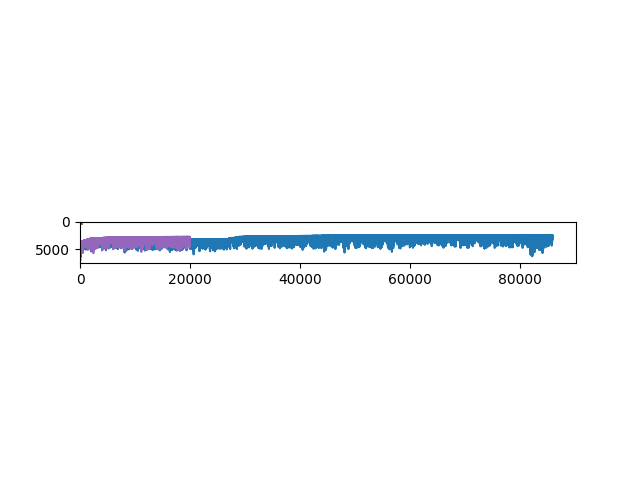

In [35]:
plt.plot(cf_value)

In [102]:
nCircles=random.sample(range(0,127), 10)
print(nCircles)


[92, 91, 5, 80, 13, 37, 124, 9, 81, 70]


In [103]:
z=92
print(z in nCircles)

True


In [37]:
plt.imshow(z)

In [53]:
z=Image.open('tree.jpg')
k=list(z.getdata())

In [96]:
k=[1,2,3]
z=2
print(z in k)

True


In [57]:
z=plt.imread('tree.jpg')

In [69]:
z[187,142]

255